# Colvars in unbiased MD simulations

In [71]:
import prody as pdy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
ref_A = pdy.parsePDB('C:/Users/Bruno/ownCloud/projects/ltp/METAMD/prup3/ligA/input/reference.pdb')
ref_A = ref_A.select('not water and not ion')

C:\Users\Bruno\Anaconda3\lib\site-packages\prody\atomic\subset.py:35: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  elif not np.issubdtype(indices.dtype, int):


## Removing water from files

In [73]:
path2files = 'C:/Users/Bruno/ownCloud/projects/ltp/data/colvars/'
files = [
    'ref_ligA.pdb', 'ref_ligB.pdb', 
    'ref_phsA.pdb', 'ref_phsB.pdb', 
    'ref_sphA.pdb', 'ref_sphB.pdb'
]

for f in files: 
    tmp_ = pdy.parsePDB(path2files + f)
    tmp_ = tmp_.select('not water and not ion')
    pdy.writePDB(atoms=tmp_, filename=path2files + f)

C:\Users\Bruno\Anaconda3\lib\site-packages\prody\atomic\subset.py:35: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  elif not np.issubdtype(indices.dtype, int):


## Setting occupancies

In [74]:
anchorstr = '(resnum 3 to 16 or resnum 26 to 31 or resnum 43 to 53) and ca'
ligandstr = 'not protein and name ' + ' '.join(['C%d' %i for i in range(1,19)])
pdy.LOGGER.verbosity = None
for f in files: 
    tmp_ = pdy.parsePDB(path2files + f)
    anchor = tmp_.select(anchorstr)
    ligand = tmp_.select(ligandstr)
    
    tmp_.setOccupancies(0.0)
    anchor.setOccupancies(1.0)
    ligand.setOccupancies(2.0)
    print(f.replace('ref_', '').replace('.pdb',''), pdy.calcCenter(ligand))
    pdy.writePDB(atoms=tmp_, filename=path2files + f)

C:\Users\Bruno\Anaconda3\lib\site-packages\prody\atomic\subset.py:35: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  elif not np.issubdtype(indices.dtype, int):


ligA [-1.74172222  0.65205556  0.70744444]
ligB [-1.10733333 -0.33633333  0.1795    ]
phsA [-1.62872222 -0.10094444  1.01244444]
phsB [-0.99533333 -1.44833333  0.4855    ]
sphA [-1.63672222 -0.11994444  1.01144444]
sphB [-0.99133333 -1.43333333  0.4985    ]


In [75]:
list_cvs = [
    '../data/colvars/ligA.colvars', '../data/colvars/ligB.colvars',
    '../data/colvars/phsA.colvars', '../data/colvars/phsB.colvars',
    '../data/colvars/sphA.colvars', '../data/colvars/sphB.colvars'
]
dfs_list = []
for item in list_cvs :
    tmp = pd.read_csv(item, sep="\s+", names = ['step', 'CV1', 'CV2'])
    tmp['raw'] = item.replace('../data/colvars/', '').replace('.colvars', '')
    tmp['molecule'] = tmp['raw'].str.extract('^(\w{3})')
    tmp['orientation'] = tmp['raw'].str.extract('^\w{3}([A,B])')
    tmp['time'] = tmp['step'] * 0.04
    dfs_list.append(tmp)
df = pd.concat(dfs_list)

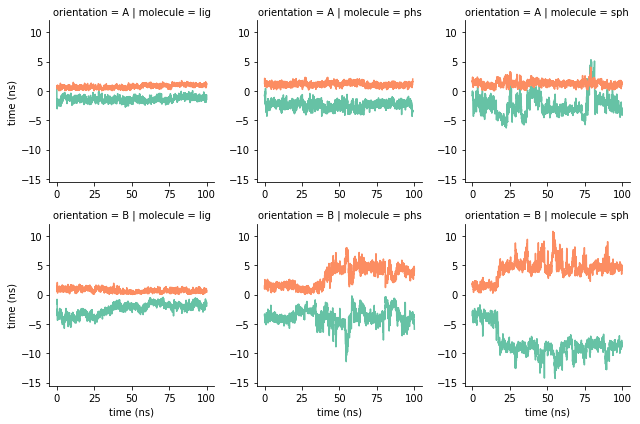

In [37]:
set2= sns.color_palette('Set2', n_colors=2)
g = sns.FacetGrid(data=df, col = 'molecule', row = 'orientation')
g.map(plt.plot, 'time', 'CV1', color = set2[0])
g.map(plt.plot, 'time', 'CV2', color = set2[1])
g.set_xlabels('time (ns)')
g.set_ylabels('')
plt.show()

In [76]:
df_stacked=pd.DataFrame(df.set_index(['molecule', 'orientation', 'step'])[['CV1', 'CV2']].stack())
df_stacked.reset_index(level=[0,1,2,3], inplace=True)
df_stacked=df_stacked.rename(columns={0:'value', 'level_3':'variable'})
df_stacked['time'] = df_stacked['step'] *0.04

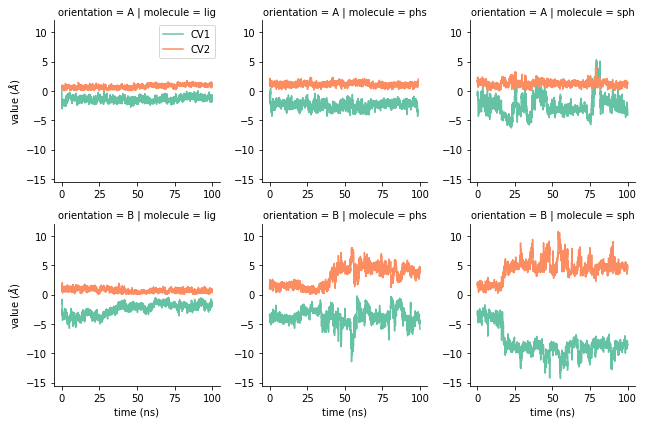

In [93]:
#set2= sns.color_palette('Set2', n_colors=2)
sns.set_palette('Set2')
g = sns.FacetGrid(data=df_stacked, col = 'molecule', row = 'orientation', hue = 'variable')
g.map(plt.plot, 'time', 'value')
g.set_xlabels('time (ns)')
g.set_ylabels('value ($\AA$)')
g.axes[0,0].legend()

plt.savefig('C:/Users/Bruno/ownCloud/projects/ltp/data/colvars/results.png', dpi=300)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D25E140B8>,
      dtype=object)